In [104]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

from mpl_toolkits.axes_grid.inset_locator import inset_axes

sys.path.append('../../../../../code/python')
from mpl_settings_v3 import *

/home/nahuel/anaconda3/envs/networks3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[]

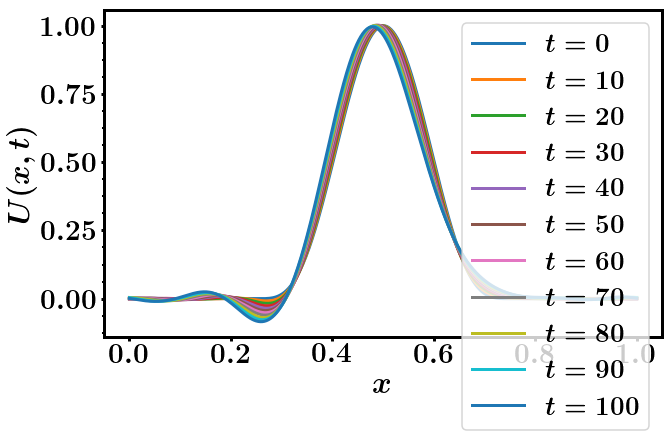

In [82]:
data = pd.read_csv('../Dump/adv_U_501.dat', sep=',', comment='#', names=['U'])
ti = data.index.values[0][0]
tf = data.index.values[-1][0]

ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)
ax = axes
ax.set_ylabel(r'$U(x,t)$')
ax.set_xlabel(r'$x$')
X = data.xs(0).index
X = X/X[-1]
for i in range(ti, tf+1, 10):
    ax.plot(X, data.xs(i).values, label=r'$t = {{{}}}$'.format(i))
    
ax.legend(loc='best')
ax.plot()

/home/nahuel/anaconda3/envs/networks3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


[]

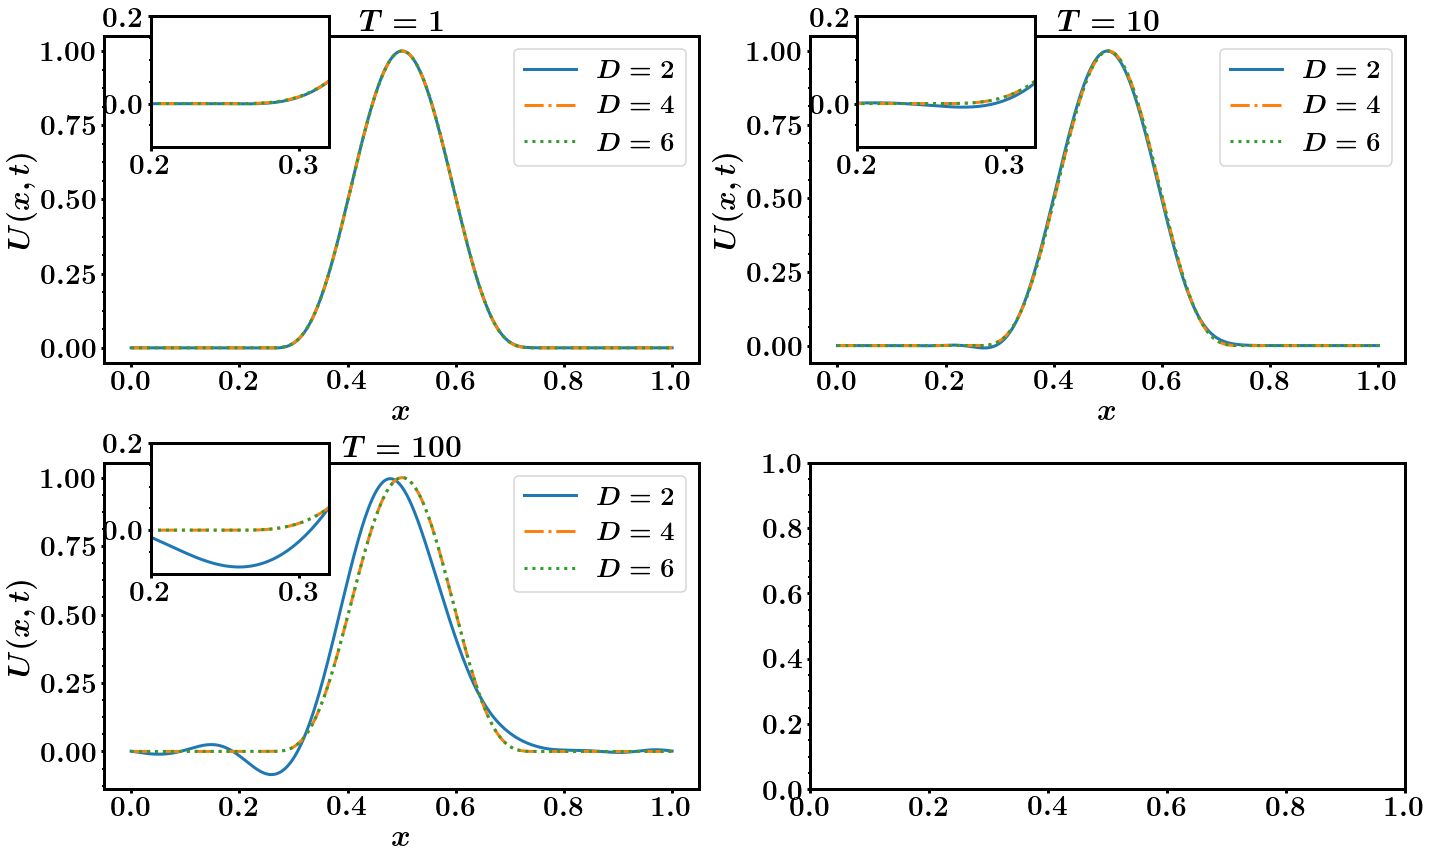

In [114]:
grid = 501
T = 1000
dataSteps = 1000
intSteps = 1000


linestyles = ['-', '-.', ':', '--']
ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)
axes = axes.flatten()

ti = 0
for i, tf in enumerate([1, 10, 100]):
    ax = axes[i]
    axins = inset_axes(ax,
            width="100%", 
            height="100%",
            bbox_to_anchor=(.1, .7, .3, .4),
            bbox_transform=ax.transAxes
        )
    for j, D in enumerate([2, 4, 6]):
        data_file_name = '../Dump/simple_D{D}_grid501_T{T}_dataSteps{dataSteps}_intSteps{intSteps}.dat'.format(
            D=D, grid=grid, T=T, dataSteps=dataSteps, intSteps=intSteps
        )
        data = pd.read_csv(data_file_name, 
                           sep=',', comment='#', names=['U'])


        ax.set_ylabel(r'$U(x,t)$')
        ax.set_xlabel(r'$x$')
        X = data.xs(0).index
        X = X/X[-1]
        ax.plot(X, data.xs(tf).values, linestyle=linestyles[j], label=r'$D = {{{}}}$'.format(D))
        ax.set_title(r'$T = {{{}}}$'.format(tf), fontsize=30)
        
        axins.set_xlim(0.2, 0.32)
        axins.set_ylim(-0.1, 0.2)
        axins.plot(X, data.xs(tf).values, linestyle=linestyles[j])
        
        
    ax.legend(loc='best')
    
plt.tight_layout()
plt.plot()